Dane: Wroclaw Corpus of Consumer Reviews Sentiment (WCCRS) https://clarin-pl.eu/dspace/handle/11321/700

### 1. Przygotowanie danych

In [2]:
import os

In [3]:
# Wczytanie wybranych plików
files = os.listdir('WCCRS/text')
texts = []

for file in files:
    with open('WCCRS/text/' + file, 'r', encoding='utf-8') as file:
        texts.append(file.readlines())

In [4]:
# Wyświetlenie nazw wczytanych plików wraz z liczbą opinii w pliku
for i, text in enumerate(texts):
    print(f"{i} - {files[i]} - {len(text)}")

0 - hotels.text.dev.txt - 317
1 - hotels.text.test.txt - 317
2 - hotels.text.train.txt - 2535
3 - medicine.text.dev.txt - 331
4 - medicine.text.test.txt - 331
5 - medicine.text.train.txt - 2651
6 - products.text.dev.txt - 99
7 - products.text.test.txt - 99
8 - products.text.train.txt - 791
9 - reviews.text.dev.txt - 99
10 - reviews.text.test.txt - 99
11 - reviews.text.train.txt - 793


In [5]:
# Łączenie danych w zbiory
# Dane przeznaczone na walidację łączę z testowymi
X_test  = texts[0] + texts[1] + texts[3] + texts[4] + texts[6] + texts[7] + texts[9] + texts[10]
X_train = texts[2] + texts[5] + texts[8] + texts[11]

# Kodowanie
# 0 - Hotele
# 1 - Medycyna
# 2 - Produkty
# 3 - Uniwersytet
lables = ['Hotele', 'Medycyna', 'Produkty', 'Uniwersytet']

y_test  = [0] * (len(texts[0]) + len(texts[1])) +\
          [1] * (len(texts[3]) + len(texts[4])) +\
          [2] * (len(texts[6]) + len(texts[7])) +\
          [3] * (len(texts[9]) + len(texts[10]))

y_train = [0] * len(texts[2]) +\
          [1] * len(texts[5]) +\
          [2] * len(texts[8]) +\
          [3] * len(texts[11])

In [6]:
# Liczebność zbiorów
print(len(y_test))
print(len(y_train))

1692
6770


### 2. Eksploracja danych

In [7]:
from collections import Counter
import spacy

# Wczytuje polski model językowy SpaCy
nlp = spacy.load("pl_core_news_sm")

In [8]:
def preprocessing(sentences, mode='words'):
    """
    Przetwarza dane wejściowe (opinie) poprzez lematyzację, usunięcie znaków interpunkcyjnych oraz stopwordsów
    
    Parametry
    ----------
    sentences : str
        Zdanie zawierające opinię
    mode : {'words', 'sentence'}
        Określa w jakiej formie zwrócić przetworzone dane

    Zwraca
    -------
    y_test_pred : str or list
        Zwraca zdanie (str) albo listę wyrazów (lsit)
    """
    # Usuwa końcówkę '__label__meta...' z każdej opinii
    pos = sentences.find("__label__meta")
    sentences = sentences[:pos]

    # Przetwórz zdanie w obiekt SpaCy
    doc = nlp(sentences)

    # Lematyzacja, zamiana na małe litery, usunięcie znaków interpunkcyjnych i stopwordsów
    text = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop]   

    if mode == 'words':
        # Zwraca listę słów
        return text
    elif mode == 'sentence':
        # Łączy słowa w jedno zdanie
        return ' '.join(text)

In [9]:
# Łączy opinie według klasy
Hotele = texts[0] + texts[1] + texts[2]
Medycyna = texts[3] + texts[4] + texts[5]
Produkty = texts[6] + texts[7] + texts[8]
Uniwersytet = texts[9] + texts[10] + texts[11]

# Liczba opinii w podziale na klasę
print(len(Hotele))
print(len(Medycyna))
print(len(Produkty))
print(len(Uniwersytet))

3169
3313
989
991


In [10]:
# Przetworzenie danych
processed_Hotele = [x for row in Hotele for x in preprocessing(row, 'words')]
processed_Medycyna = [x for row in Medycyna for x in preprocessing(row, 'words')]
processed_Produkty = [x for row in Produkty for x in preprocessing(row, 'words')]
processed_Uniwersytet = [x for row in Uniwersytet for x in preprocessing(row, 'words')]
# 3 min

In [11]:
# Zlicza występowanie słów
Hotele_counter = Counter(processed_Hotele)
Medycyna_counter = Counter(processed_Medycyna)
Produkty_counter = Counter(processed_Produkty)
Uniwersytet_counter = Counter(processed_Uniwersytet)

In [ ]:
# Top10 słów pod względem częstości
Hotele_counter.most_common(10)

### 3. Preprocessing

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [14]:
# Przetworzenie zbiorów
X_test_processed = [preprocessing(row, 'sentence') for row in X_test]
X_train_processed = [preprocessing(row, 'sentence') for row in X_train]
# 3 min

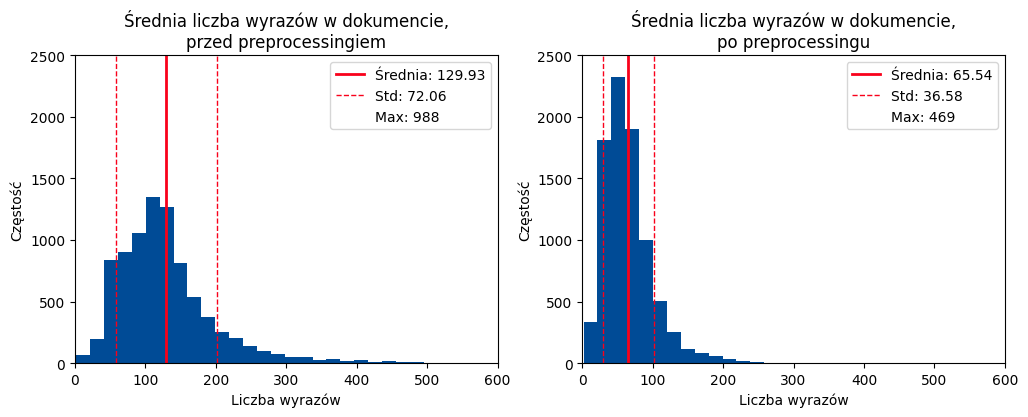

In [15]:
# lista z liczbą wyrazów w dokumencie PRZED preprocessingiem
len_sentences = [(sentences.count(' ') + 1) for sentences in X_test] + [(sentences.count(' ') + 1) for sentences in X_train]

mean = np.mean(len_sentences)
std = np.std(len_sentences)
maxx = np.max(len_sentences)

plt.figure(figsize=(12, 4))

ax0 = plt.subplot(121)
_, bins, _ = ax0.hist(len_sentences, bins=50, color='#004b96')
ax0.axvline(x = mean, color='#f9011b', linestyle='-', linewidth=2, label=f"Średnia: {round(mean,2)}")
ax0.axvline(x = mean-std, color='#f9011b', linestyle='--', linewidth=1, label=f"Std: {round(std,2)}")
ax0.axvline(x = maxx, color='#f9011b', linestyle='-', linewidth=0, label=f"Max: {maxx}")
ax0.axvline(x = mean+std, color='#f9011b', linestyle='--', linewidth=1)
ax0.set_title("Średnia liczba wyrazów w dokumencie,\nprzed preprocessingiem")
ax0.set_ylabel("Częstość")
ax0.set_xlabel('Liczba wyrazów')
ax0.set_ylim((0, 2500))
ax0.set_xlim((0, 600))
ax0.legend(loc=1)

# lista z liczbą wyrazów w dokumencie PO preprocessingu
len_sentences_processed = [(sentences.count(' ') + 1) for sentences in X_test_processed] + [(sentences.count(' ') + 1) for sentences in X_train_processed]

mean = np.mean(len_sentences_processed)
std = np.std(len_sentences_processed)
maxx = np.max(len_sentences_processed)

ax1 = plt.subplot(122)
ax1.hist(len_sentences_processed, bins=bins, color='#004b96')
ax1.axvline(x = mean, color='#f9011b', linestyle='-', linewidth=2, label=f"Średnia: {round(mean,2)}")
ax1.axvline(x = mean-std, color='#f9011b', linestyle='--', linewidth=1, label=f"Std: {round(std,2)}")
ax1.axvline(x = maxx, color='#f9011b', linestyle='-', linewidth=0, label=f"Max: {maxx}")
ax1.axvline(x = mean+std, color='#f9011b', linestyle='--', linewidth=1)
ax1.set_title("Średnia liczba wyrazów w dokumencie,\npo preprocessingu")
ax1.set_ylabel("Częstość")
ax1.set_xlabel('Liczba wyrazów')
ax1.set_ylim((0, 2500))
ax1.set_xlim((0, 600))
ax1.legend(loc=1)

plt.show()

In [16]:
# Użycie CountVectorizer do przekształcenia tekstu na macierz cech
# vectorizer = CountVectorizer()

# Użycie TfidfVectorizer do przekształcenia tekstu na macierz cech
vectorizer = TfidfVectorizer()

# Przekształcenie danych treningowych
X_train_vectorized = vectorizer.fit_transform(X_train_processed)

# Przekształcenie danych testowych
X_test_vectorized = vectorizer.transform(X_test_processed)

In [17]:
X_train_vectorized

<6770x49774 sparse matrix of type '<class 'numpy.float64'>'
	with 377902 stored elements in Compressed Sparse Row format>

### 4. Modele

In [30]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, classification_report

In [31]:
def predict_metrics(model, X_train_vectorized, y_train, X_test_vectorized, y_test):
    """
    Oblicza predykcję i wyświetla metryki
    
    Parametry
    ----------
    model : estimator object
        Obiekt modelu
    X_train_vectorized : csr_matrix
        Macierz cech zbioru treningowego
    y_train : list
        Etykiety zbioru treningowego
    X_test_vectorized : csr_matrix
        Macierz cech zbioru testowego
    y_test : list
        Etykiety zbioru testowego

    Zwraca
    -------
    y_test_pred : list
        Listę predykcji na zbiorze testowym
    f1_weighted : float
        Wartość F1-Score (weighted) na zbiorze testowym
    """
    # Predykcja na danych uczących
    y_train_pred = model.predict(X_train_vectorized)
    f1_weighted = f1_score(y_train, y_train_pred, average='weighted')
    print(f"F1-Score (weighted) na uczącym: {f1_weighted:.4f}")

    # Predykcja na danych testowych
    y_test_pred = model.predict(X_test_vectorized)
    f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
    print(f"F1-Score (weighted) na testowym: {f1_weighted:.4f}")

    report = classification_report(y_test, y_test_pred, digits=3)
    print("Classification Report:\n", report)

    # Zwraca predykcję i wynik F1 score
    return y_test_pred, f1_weighted

In [32]:
def grid_and_fit(model, param_grid, X_train_vectorized, y_train):
    """
    Przeprowadza przeszukiwanie siatki hiperparametrów za pomocą GridSearchCV oraz trenuje najlepszy model
    
    Parametry
    ----------
    model : estimator object
        Obiekt modelu
    param_grid : dict
        Słownik z parametrami
    
    Zwraca
    -------
    best_model : estimator object
        Najlepszy model znaleziony podczas przeszukiwania siatki, wytrenowany na pełnym zbiorze treningowym
    """
    # Wykorzystanie GridSearchCV do znalezienia najlepszych parametrów
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted', verbose=2, n_jobs=-1)
    grid_search.fit(X_train_vectorized, y_train)

    # Najlepsze parametry
    best_params = grid_search.best_params_
    print(f"Najlepsze parametry: {best_params}")

    # Trenowanie najlepszego modelu logistycznej regresji
    best_model = grid_search.best_estimator_
    best_model.fit(X_train_vectorized, y_train)

    return best_model

#### 4.1. Naive Bayes

In [33]:
model_NB = MultinomialNB()
model_NB.fit(X_train_vectorized, y_train)

y_test_pred_NB, f1_weighted_NB = predict_metrics(model_NB, X_train_vectorized, y_train, X_test_vectorized, y_test)

F1-Score (weighted) na uczącym: 0.8611
F1-Score (weighted) na testowym: 0.8040
Classification Report:
               precision    recall  f1-score   support

           0      0.838     0.989     0.907       634
           1      0.826     0.995     0.903       662
           2      1.000     0.086     0.158       198
           3      1.000     0.652     0.789       198

    accuracy                          0.846      1692
   macro avg      0.916     0.680     0.689      1692
weighted avg      0.871     0.846     0.804      1692



In [34]:
# Szukamy najlepszego modelu przeszukując siatkę parametrów
model_NB_best = MultinomialNB()
param_grid_NB = {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 2],  # Parametr wygładzania Laplace'a
                 'fit_prior': [True, False]}  # Czy uwzględniać priorytety klas

model_NB_best = grid_and_fit(model_NB_best, param_grid_NB, X_train_vectorized, y_train)
y_test_pred_NB_best, f1_weighted_NB_best = predict_metrics(model_NB_best, X_train_vectorized, y_train, X_test_vectorized, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Najlepsze parametry: {'alpha': 0.1, 'fit_prior': False}
F1-Score (weighted) na uczącym: 0.9991
F1-Score (weighted) na testowym: 0.9820
Classification Report:
               precision    recall  f1-score   support

           0      0.989     0.995     0.992       634
           1      0.969     0.992     0.981       662
           2      0.989     0.894     0.939       198
           3      1.000     0.995     0.997       198

    accuracy                          0.982      1692
   macro avg      0.987     0.969     0.977      1692
weighted avg      0.982     0.982     0.982      1692



#### 4.2. Logistic Regression

In [35]:
model_LR = LogisticRegression(max_iter=100)
model_LR.fit(X_train_vectorized, y_train)

y_test_pred_LR, f1_weighted_LR = predict_metrics(model_LR, X_train_vectorized, y_train, X_test_vectorized, y_test)

F1-Score (weighted) na uczącym: 0.9985
F1-Score (weighted) na testowym: 0.9797
Classification Report:
               precision    recall  f1-score   support

           0      0.992     0.994     0.993       634
           1      0.958     0.998     0.978       662
           2      1.000     0.904     0.950       198
           3      1.000     0.949     0.974       198

    accuracy                          0.980      1692
   macro avg      0.988     0.961     0.974      1692
weighted avg      0.981     0.980     0.980      1692



In [36]:
# Szukamy najlepszego modelu przeszukując siatkę parametrów
# Dla CountVectorizer: max_iter=5
model_LR_best = LogisticRegression(random_state=42, max_iter=20)
param_grid_LR = {'C': [0.1, 1, 10, 20, 50, 100],  # Odwrotność siły regularizacji
                 'penalty': ['l1', 'l2'],  # Typ regularizacji
                 'solver': ['liblinear', 'saga']}  # Algorytmy optymalizacyjne

model_LR_best = grid_and_fit(model_LR_best, param_grid_LR, X_train_vectorized, y_train)
y_test_pred_LR_best, f1_weighted_LR_best = predict_metrics(model_LR_best, X_train_vectorized, y_train, X_test_vectorized, y_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\Bartek\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Najlepsze parametry: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
F1-Score (weighted) na uczącym: 1.0000
F1-Score (weighted) na testowym: 0.9911
Classification Report:
               precision    recall  f1-score   support

           0      0.997     0.997     0.997       634
           1      0.982     0.998     0.990       662
           2      0.995     0.965     0.979       198
           3      1.000     0.975     0.987       198

    accuracy                          0.991      1692
   macro avg      0.993     0.984     0.988      1692
weighted avg      0.991     0.991     0.991      1692



C:\Users\Bartek\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### 4.3. SVC

In [37]:
model_SVC = SVC(kernel='linear', C=1)
model_SVC.fit(X_train_vectorized, y_train)

y_test_pred_SVC, f1_weighted_SVC = predict_metrics(model_SVC, X_train_vectorized, y_train, X_test_vectorized, y_test)

F1-Score (weighted) na uczącym: 0.9999
F1-Score (weighted) na testowym: 0.9899
Classification Report:
               precision    recall  f1-score   support

           0      0.995     0.997     0.996       634
           1      0.982     0.998     0.990       662
           2      0.990     0.965     0.977       198
           3      1.000     0.965     0.982       198

    accuracy                          0.990      1692
   macro avg      0.992     0.981     0.986      1692
weighted avg      0.990     0.990     0.990      1692



In [38]:
# Szukamy najlepszego modelu przeszukując siatkę parametrów
model_SVC_best = SVC(kernel='linear')
param_grid_SVC = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
                  'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

model_SVC_best = grid_and_fit(model_SVC_best, param_grid_SVC, X_train_vectorized, y_train)
y_test_pred_SVC_best, f1_weighted_SVC_best = predict_metrics(model_SVC_best, X_train_vectorized, y_train, X_test_vectorized, y_test)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Najlepsze parametry: {'C': 1, 'kernel': 'sigmoid'}
F1-Score (weighted) na uczącym: 0.9996
F1-Score (weighted) na testowym: 0.9905
Classification Report:
               precision    recall  f1-score   support

           0      0.995     0.997     0.996       634
           1      0.982     0.998     0.990       662
           2      0.995     0.970     0.982       198
           3      1.000     0.965     0.982       198

    accuracy                          0.991      1692
   macro avg      0.993     0.982     0.988      1692
weighted avg      0.991     0.991     0.991      1692



#### 4.4. kNN

In [39]:
model_kNN = KNeighborsClassifier(n_neighbors=4)
model_kNN.fit(X_train_vectorized, y_train)

y_test_pred_kNN, f1_weighted_kNN = predict_metrics(model_kNN, X_train_vectorized, y_train, X_test_vectorized, y_test)

F1-Score (weighted) na uczącym: 0.6619
F1-Score (weighted) na testowym: 0.6530
Classification Report:
               precision    recall  f1-score   support

           0      0.990     0.921     0.954       634
           1      0.600     0.997     0.749       662
           2      0.000     0.000     0.000       198
           3      1.000     0.010     0.020       198

    accuracy                          0.736      1692
   macro avg      0.647     0.482     0.431      1692
weighted avg      0.723     0.736     0.653      1692



C:\Users\Bartek\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bartek\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bartek\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [40]:
# Szukamy najlepszego modelu przeszukując siatkę parametrów
model_kNN_best = KNeighborsClassifier()
param_grid_kNN = {'n_neighbors': list(range(1, 31))}  # Przeszukujemy wartości od 1 do 30

model_kNN_best = grid_and_fit(model_kNN_best, param_grid_kNN, X_train_vectorized, y_train)
y_test_pred_kNN_best, f1_weighted_kNN_best = predict_metrics(model_kNN_best, X_train_vectorized, y_train, X_test_vectorized, y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Najlepsze parametry: {'n_neighbors': 12}
F1-Score (weighted) na uczącym: 0.9634
F1-Score (weighted) na testowym: 0.9546
Classification Report:
               precision    recall  f1-score   support

           0      0.967     0.984     0.976       634
           1      0.929     0.994     0.961       662
           2      0.987     0.742     0.847       198
           3      0.995     0.955     0.974       198

    accuracy                          0.956      1692
   macro avg      0.970     0.919     0.939      1692
weighted avg      0.958     0.956     0.955      1692



#### 4.5. Ridge Classifier

In [41]:
model_RC = RidgeClassifier()
model_RC.fit(X_train_vectorized, y_train)

y_test_pred_RC, f1_weighted_RC = predict_metrics(model_RC, X_train_vectorized, y_train, X_test_vectorized, y_test)

F1-Score (weighted) na uczącym: 1.0000
F1-Score (weighted) na testowym: 0.9869
Classification Report:
               precision    recall  f1-score   support

           0      0.994     0.998     0.996       634
           1      0.973     0.998     0.986       662
           2      1.000     0.944     0.971       198
           3      1.000     0.955     0.977       198

    accuracy                          0.987      1692
   macro avg      0.992     0.974     0.983      1692
weighted avg      0.987     0.987     0.987      1692



In [42]:
# Szukamy najlepszego modelu przeszukując siatkę parametrów
model_RC_best = RidgeClassifier()
param_grid_RC = {'alpha': [0.001, 0.01, 0.1, 1, 10, 20, 50, 100, 200, 500],  # Siła regularizacji
                 'solver': ['auto', 'lsqr', 'sparse_cg', 'sag']}  # Algorytmy optymalizacji

model_RC_best = grid_and_fit(model_RC_best, param_grid_RC, X_train_vectorized, y_train)
y_test_pred_RC_best, f1_weighted_RC_best = predict_metrics(model_RC_best, X_train_vectorized, y_train, X_test_vectorized, y_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Najlepsze parametry: {'alpha': 1, 'solver': 'auto'}
F1-Score (weighted) na uczącym: 1.0000
F1-Score (weighted) na testowym: 0.9869
Classification Report:
               precision    recall  f1-score   support

           0      0.994     0.998     0.996       634
           1      0.973     0.998     0.986       662
           2      1.000     0.944     0.971       198
           3      1.000     0.955     0.977       198

    accuracy                          0.987      1692
   macro avg      0.992     0.974     0.983      1692
weighted avg      0.987     0.987     0.987      1692



### 5. Porównanie modeli

In [44]:
print('F1-Score (weighted)\n')
print('Model', ' '*17, 'Default', ' '*7, 'Best')
print('-'*46)
print(f'Naive Bayes:         \t{round(f1_weighted_NB, 4)} \t\t{round(f1_weighted_NB_best, 4)}')
print(f'Logistic Regression: \t{round(f1_weighted_LR, 4)} \t\t{round(f1_weighted_LR_best,  4)}')
print(f'SVC:                 \t{round(f1_weighted_SVC, 4)}\t\t{round(f1_weighted_SVC_best, 4)}')
print(f'kNN:                 \t{round(f1_weighted_kNN, 4)}\t\t{round(f1_weighted_kNN_best, 4)}')
print(f'Ridge Classifier:    \t{round(f1_weighted_RC, 4)} \t\t{round(f1_weighted_RC_best, 4)}')

F1-Score (weighted)

Model                   Default         Best
----------------------------------------------
Naive Bayes:         	0.804 		0.982
Logistic Regression: 	0.9797 		0.9911
SVC:                 	0.9899		0.9905
kNN:                 	0.653		0.9546
Ridge Classifier:    	0.9869 		0.9869


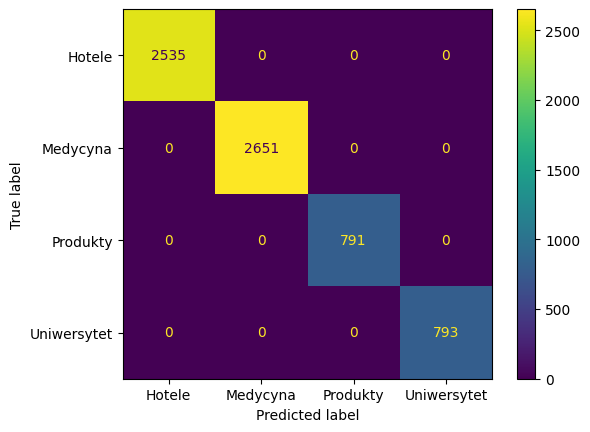

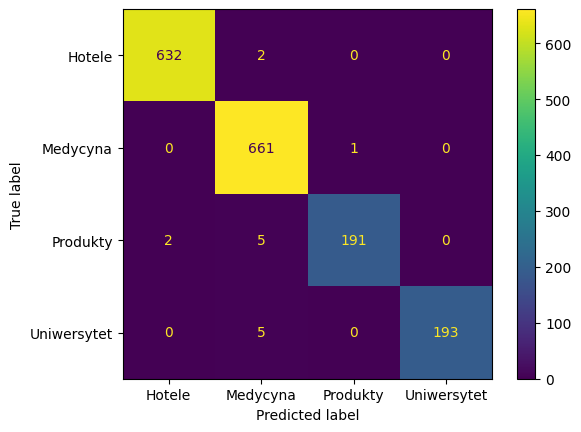

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_LR_best, X_train_vectorized, y_train, display_labels=lables)
ConfusionMatrixDisplay.from_estimator(model_LR_best, X_test_vectorized, y_test, display_labels=lables)

### 6. Test modelu

Przeprowadzenie testu na najlepszym modelu

In [46]:
np.set_printoptions(suppress=True, precision=4)

In [47]:
def test_modelu(zdanie, model):
    sent = vectorizer.transform([preprocessing(zdanie, 'sentence')])
    result = model.predict_proba(sent)

    return result

In [48]:
sentences = 'Lekarz spóźnił się na wykład i zajęcia ponieważ zapomniał laptopa z hotelu.'

print('       Hotele', 'Medycyna', 'Produkty', 'Uniwersytet')
test_modelu(sentences, model_LR_best)

       Hotele Medycyna Produkty Uniwersytet


array([[0.0395, 0.0062, 0.0005, 0.9538]])